### Importing the dependecies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

####Data preprocessing

In [ ]:
credit_card_dataset = pd.read_csv('/creditcard.csv')
credit_card_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57526,47945,1.138100,0.186695,0.224979,1.098891,-0.149107,-0.494817,0.158646,-0.082146,0.031110,...,0.070575,0.193698,-0.093600,0.078039,0.590292,-0.300950,0.021664,0.021820,36.86,0.0
57527,47946,-0.646913,1.130799,1.050571,-0.569363,0.844107,0.227605,0.808902,-0.130225,-0.290188,...,-0.327854,-0.647464,-0.188020,-1.029697,0.014101,0.101051,0.084340,-0.074503,1.98,0.0
57528,47946,1.214047,0.217891,0.399390,0.945208,-0.101512,-0.108244,-0.099976,0.071885,0.248587,...,-0.293180,-0.859018,0.125645,-0.508650,0.253563,-0.629445,0.040633,0.022467,2.99,0.0
57529,47946,-0.637264,1.187105,0.911446,0.827789,-0.241755,-0.431410,0.482341,0.395142,-1.095934,...,0.272207,0.604289,-0.037705,0.339703,-0.250802,-0.350949,0.031500,0.094337,45.00,0.0
57530,47946,-1.054793,0.820159,0.709861,-0.071631,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_card_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57531 entries, 0 to 57530
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57531 non-null  int64  
 1   V1      57531 non-null  float64
 2   V2      57531 non-null  float64
 3   V3      57531 non-null  float64
 4   V4      57531 non-null  float64
 5   V5      57530 non-null  float64
 6   V6      57530 non-null  float64
 7   V7      57530 non-null  float64
 8   V8      57530 non-null  float64
 9   V9      57530 non-null  float64
 10  V10     57530 non-null  float64
 11  V11     57530 non-null  float64
 12  V12     57530 non-null  float64
 13  V13     57530 non-null  float64
 14  V14     57530 non-null  float64
 15  V15     57530 non-null  float64
 16  V16     57530 non-null  float64
 17  V17     57530 non-null  float64
 18  V18     57530 non-null  float64
 19  V19     57530 non-null  float64
 20  V20     57530 non-null  float64
 21  V21     57530 non-null  float64
 22

In [ ]:
credit_card_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
credit_card_dataset.shape

(57531, 31)

In [ ]:
# checking the distribution of the data
credit_card_dataset['Class'].value_counts()

0.0    57371
1.0      159
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


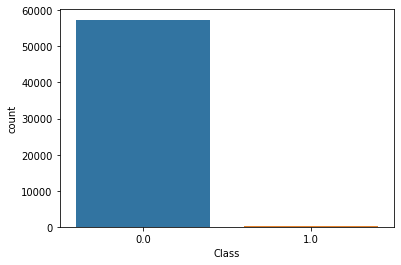

In [ ]:
sns.countplot('Class', data=credit_card_dataset)

#####Highly unbalance dataset

### Data Analysis
0 -> Legit
1 -> Fraud
####seperating the class column into Fraud and Legit

In [ ]:
Legit = credit_card_dataset[credit_card_dataset['Class'] == 0]
Fraud = credit_card_dataset[credit_card_dataset['Class'] == 1]

In [ ]:
Legit.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0


In [ ]:
Fraud.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.0,1.0


In [ ]:
# Getting statistical info about the data
Legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57371.000000,57371.000000,57371.000000,57371.000000,57371.000000,57371.000000,57371.000000,57371.000000,57371.000000,57371.000000,...,57371.000000,57371.000000,57371.000000,57371.000000,57371.000000,57371.000000,57371.000000,57371.000000,57371.000000,57371.0
mean,31182.415593,-0.219113,-0.022390,0.719137,0.156512,-0.245965,0.109222,-0.096562,0.046517,0.082463,...,-0.030106,-0.105994,-0.038668,0.007397,0.135838,0.019652,0.001468,0.003733,94.964936,0.0
std,13538.619052,1.779924,1.607470,1.271570,1.351026,1.333020,1.303732,1.139439,1.148399,1.168016,...,0.720888,0.635666,0.587204,0.596822,0.435451,0.499338,0.378949,0.323134,258.837451,0.0
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-4.532523,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.0
25%,25540.500000,-0.988709,-0.584525,0.213461,-0.730471,-0.874277,-0.632146,-0.603000,-0.145648,-0.638639,...,-0.228984,-0.526000,-0.179684,-0.324511,-0.127696,-0.330502,-0.063592,-0.006436,7.730000,0.0
50%,35156.000000,-0.239998,0.072105,0.786985,0.177288,-0.291903,-0.150194,-0.074302,0.060556,-0.030635,...,-0.064621,-0.080751,-0.051968,0.062227,0.174808,-0.076030,0.008556,0.022431,26.000000,0.0
75%,41396.000000,1.155585,0.726756,1.419589,1.047040,0.279874,0.494333,0.425660,0.333651,0.754059,...,0.110566,0.308494,0.078700,0.402683,0.421951,0.296229,0.081677,0.075794,87.265000,0.0
max,47946.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,18.709255,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,0.0


In [ ]:
Fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.0
mean,28211.811321,-7.202722,5.178029,-9.744764,5.629843,-5.323789,-2.182973,-7.596616,3.494864,-3.408036,...,0.866669,-0.211629,-0.271093,-0.081439,0.238644,0.127501,0.573380,0.033555,94.008491,1.0
std,13383.411348,8.339594,4.292521,8.703382,2.930251,6.462556,1.528823,6.900337,5.428580,2.604713,...,1.338110,0.833956,1.749950,0.530097,1.013919,0.393126,1.245282,0.631304,226.356407,0.0
min,406.000000,-30.552380,-5.198360,-31.103685,-1.255593,-22.105532,-4.977692,-21.922811,-3.277535,-9.283925,...,-2.475962,-2.288686,-19.254328,-1.632653,-4.781606,-1.055997,-3.908080,-1.869290,0.000000,1.0
25%,17203.500000,-13.330851,2.049819,-15.728475,3.313205,-9.890956,-3.122843,-14.256291,0.132350,-5.656687,...,0.234292,-0.636614,-0.549598,-0.368458,-0.256838,-0.219638,0.043097,-0.158764,1.000000,1.0
50%,28726.000000,-3.891192,4.132464,-6.340884,6.017295,-3.070776,-2.324307,-5.551433,1.189472,-3.591491,...,0.882940,-0.097712,-0.128427,0.070614,0.156282,0.164709,0.565125,0.192177,4.560000,1.0
75%,41203.500000,-1.193892,7.399706,-2.985851,7.281923,-0.553628,-1.111477,-1.699106,5.110949,-1.306145,...,1.808624,0.346746,0.190780,0.225485,0.995387,0.489365,1.446513,0.442022,99.990000,1.0
max,47923.000000,1.234235,16.713389,2.041003,11.927512,5.269255,3.628382,5.431271,20.007208,2.820829,...,3.147428,1.745315,2.661291,0.795190,2.208209,0.816762,3.052358,1.130625,1809.680000,1.0


In [ ]:
# comparing the values for both transactions
credit_card_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,31182.415593,-0.219113,-0.022390,0.719137,0.156512,-0.245965,0.109222,-0.096562,0.046517,0.082463,...,0.046811,-0.030106,-0.105994,-0.038668,0.007397,0.135838,0.019652,0.001468,0.003733,94.964936
1.0,28211.811321,-7.202722,5.178029,-9.744764,5.629843,-5.323789,-2.182973,-7.596616,3.494864,-3.408036,...,0.440868,0.866669,-0.211629,-0.271093,-0.081439,0.238644,0.127501,0.573380,0.033555,94.008491


### Under sampling

####Number of fraudulent transactions = 492

In [ ]:
Legit_sample = Legit.sample(n=492)
Legit_sample.shape

(492, 31)

####Concatenating Legit_sample and Fraud dataset

In [ ]:
updated_credit_card_dataset = pd.concat([Legit_sample, Fraud], axis=0)
updated_credit_card_dataset.shape


(651, 31)

### Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


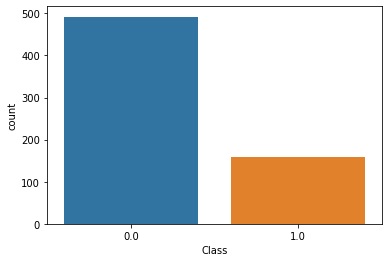

In [ ]:
sns.countplot('Class', data=updated_credit_card_dataset)

In [ ]:
# seperating data into feature and target
x = updated_credit_card_dataset.drop(['Class'], axis=1)
y = updated_credit_card_dataset['Class']

In [ ]:
# Splitting the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(651, 30) (520, 30) (131, 30)


### Model Building

In [ ]:
model = LogisticRegression()

In [ ]:
# Fitting the model with the train and test data
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### Model Evaluation

In [ ]:
x_train_prediction = model.predict(x_train)

In [ ]:
x_train_accuracy_score = accuracy_score(x_train_prediction, y_train)
x_train_accuracy_score

0.9826923076923076

In [ ]:
x_test_prediction = model.predict(x_test)

In [ ]:
x_test_accuracy_score = accuracy_score(x_test_prediction, y_test)
x_test_accuracy_score

0.9694656488549618

### Building a predictive system

In [ ]:
#input data
input_data = (7543,0.329594333,3.712889295,-5.775935108,6.078265506,1.667359013,-2.420168414,-0.812891249,0.133080118,-2.214311312,-5.134454471,4.560720106,-8.873748362,-0.7974836,-9.17716637,-0.257024775,-0.87168849,1.313013629,0.773913873,-2.370599451,0.269772776,0.156617169,-0.652450441,-0.551572219,-0.716521635,1.415716615,0.55526474,0.530507389,0.404474055,1)

#change the input data to a numpy array
to_numpy = np.asarray(input_data)

#reshape for one instance
input_reshape = to_numpy.reshape(1, -1)

#building a predictive model
prediction = model.predict(input_reshape)
print(prediction)

if(prediction[0] == 0):
  print('Legal transaction')
else:
  print('Fradulent transaction')


[1.]
Fradulent transaction


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### Saving the model

In [ ]:
import pickle

In [ ]:
filename = "trained model.sav"
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained model.sav', 'rb'))

In [ ]:
#input data
input_data = (7543,0.329594333,3.712889295,-5.775935108,6.078265506,1.667359013,-2.420168414,-0.812891249,0.133080118,-2.214311312,-5.134454471,4.560720106,-8.873748362,-0.7974836,-9.17716637,-0.257024775,-0.87168849,1.313013629,0.773913873,-2.370599451,0.269772776,0.156617169,-0.652450441,-0.551572219,-0.716521635,1.415716615,0.55526474,0.530507389,0.404474055,1)

#change the input data to a numpy array
to_numpy = np.asarray(input_data)

#reshape for one instance
input_reshape = to_numpy.reshape(1, -1)

#building a predictive model
prediction = loaded_model.predict(input_reshape)
print(prediction)

if(prediction[0] == 0):
  print('Legal transaction')
else:
  print('Fradulent transaction')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


[1.]
Fradulent transaction
